In [265]:
import pandas as pd
from collections import Counter
from pprint import pprint
from matplotlib import pyplot as plt
import seaborn as sns
from pathlib import Path
import numpy as np
from itertools import combinations
from pprint import pprint
from collections import defaultdict
import math

In [266]:
data_dir = Path('../data')

In [267]:
data_path = data_dir / 'Dataset3.csv'
df = pd.read_csv(data_path)
df

,Temperature,Humidity,Rainfall,Soil,Crop,Fertilizer
0,24.87,82.84,295.61,Clayey,rice,DAP
1,28.69,96.65,178.96,laterite,Coconut,Good NPK
2,20.27,81.64,270.44,silty clay,rice,MOP
3,25.07,95.02,192.90,sandy,Coconut,Urea
4,25.04,95.90,174.80,coastal,Coconut,Urea
...,...,...,...,...,...,...
290,26.07,96.70,143.53,sandy,Coconut,MOP
291,25.63,83.53,209.90,silty clay,rice,MOP
292,24.52,83.54,230.45,Clayey,rice,MOP
293,25.66,83.47,217.38,Clayey,rice,MOP


# discretize the data

In [268]:
df

,Temperature,Humidity,Rainfall,Soil,Crop,Fertilizer
0,24.87,82.84,295.61,Clayey,rice,DAP
1,28.69,96.65,178.96,laterite,Coconut,Good NPK
2,20.27,81.64,270.44,silty clay,rice,MOP
3,25.07,95.02,192.90,sandy,Coconut,Urea
4,25.04,95.90,174.80,coastal,Coconut,Urea
...,...,...,...,...,...,...
290,26.07,96.70,143.53,sandy,Coconut,MOP
291,25.63,83.53,209.90,silty clay,rice,MOP
292,24.52,83.54,230.45,Clayey,rice,MOP
293,25.66,83.47,217.38,Clayey,rice,MOP


In [269]:
df.describe()

,Temperature,Humidity,Rainfall
count,295.000000,295.000000,295.000000
mean,25.522068,88.472271,205.330983
std,2.495289,6.550542,43.276280
min,20.050000,80.120000,131.090000
25%,23.810000,82.275000,172.480000
50%,25.760000,84.970000,202.940000
75%,27.170000,94.800000,231.560000
max,29.870000,99.980000,298.560000


In [270]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  295 non-null    float64
 1   Humidity     295 non-null    float64
 2   Rainfall     295 non-null    float64
 3   Soil         295 non-null    object 
 4   Crop         295 non-null    object 
 5   Fertilizer   295 non-null    object 
dtypes: float64(3), object(3)
memory usage: 14.0+ KB


In [271]:
# check if there is duplicated rows or missing values
df.duplicated().sum()

0

In [272]:
df.isna().sum()

Temperature    0
Humidity       0
Rainfall       0
Soil           0
Crop           0
Fertilizer     0
dtype: int64

In [273]:
for col in df.select_dtypes('object').columns:
    print(col, df[col].unique())

Soil ['Clayey' 'laterite' 'silty clay' 'sandy' 'coastal' 'clay loam' 'alluvial']
Crop ['rice' 'Coconut']
Fertilizer ['DAP' 'Good NPK' 'MOP' 'Urea']


we choose soil as out items because it has the unique values

In [274]:
def discretize_equal_width(input_df, column, *, n_bins=0):
    input_df = input_df.copy()
    sorted_data = input_df[column].sort_values()
    if n_bins == 0:
        n_bins =  int(1 + (10 / 3) * math.log10(len(sorted_data)))
    ranges = np.linspace(sorted_data.min(), sorted_data.max(), n_bins + 1)
    labels = [f'{ranges[i]:.2f} - {ranges[i+1]:.2f}' for i in range(n_bins)]
    current_bin = 0
    class_column = []
    for i, row_temp in enumerate(sorted_data):
        if row_temp > ranges[current_bin + 1]:
            current_bin += 1
        class_column.append(labels[current_bin])
    input_df['class'] = class_column
    input_df.drop(columns=[column], inplace=True)
    return input_df


In [275]:
df_width = discretize_equal_width(df, 'Temperature')

In [276]:
def plot_classes(input_df):
    sns.countplot(x='class', data=input_df)
    plt.xticks(rotation=45)
    plt.xlabel('classes')
    plt.ylabel('Count')
    plt.title('class distribution')
    plt.show()

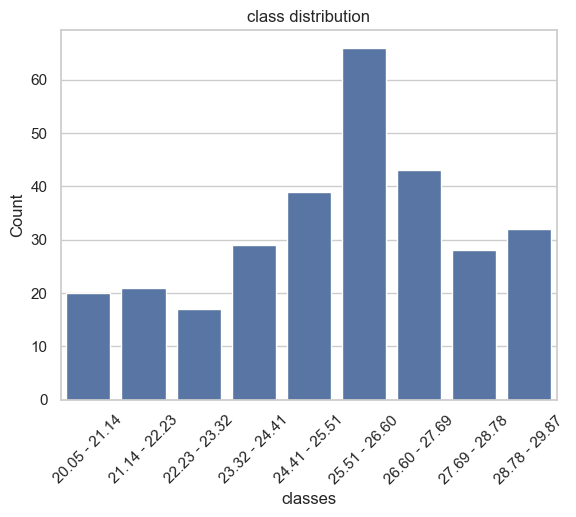

In [277]:
plot_classes(df_width)

In [278]:
def discretize_equal_freq(input_df, column, *, n_bins=0):
    input_df = input_df.copy()

    if n_bins == 0:
        n_bins = int(1 + (10 / 3) * math.log10(len(input_df[column])))

    sorted_values = sorted(input_df[column])

    bin_edges = [sorted_values[i * len(sorted_values) // n_bins] for i in range(n_bins)]
    bin_edges.append(sorted_values[-1])  # Include the maximum value
    print(bin_edges)
    labels = [str(i) for i in range(1, n_bins + 1)]

    discrete_column = []
    current_bin = 0

    for i, value in enumerate(sorted_values):
        if value > bin_edges[current_bin + 1]:
            current_bin += 1
        discrete_column.append(labels[current_bin])

    input_df['class'] = discrete_column

    return input_df

In [279]:
df_freq = discretize_equal_freq(df, 'Temperature')

[20.05, 21.84, 23.45, 24.87, 25.55, 26.11, 26.76, 27.56, 28.74, 29.87]


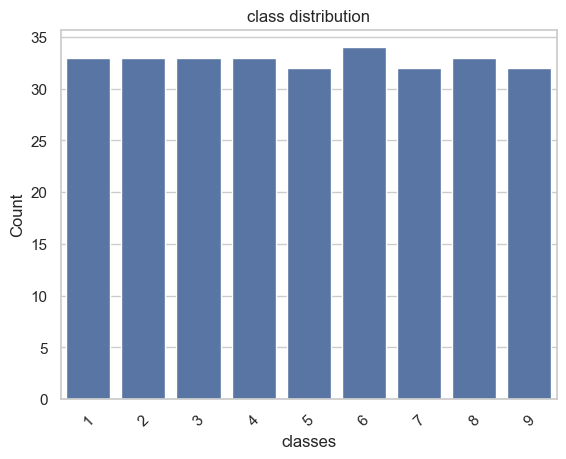

In [280]:
plot_classes(df_freq)